In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [2]:
us_gas_data = pd.read_csv('us_gas_data.csv')
us_gas_data

,Year,Month,Gas_Procution(Mmcf),Gas_Consumption(Mmcf),Import_price($/Mcf),Export_price($/Mcf),Total Imports (Mmcf),Total Exports (Mmcf),all_grades($/Gallon),regular($/Gallon),midgrade($/Gallon),premium($/Gallon),diesel($/Gallon),Volumn(Mmcf)
0,2022,2,2856356,3040029.0,5.62,8.22,259389,545563,3.611,3.517,3.939,4.210,4.032,5997164.0
1,2022,1,3180818,3591557.0,6.87,7.04,296179,610102,3.413,3.315,3.766,4.036,3.724,6653327.0
2,2021,12,3266272,2979653.0,4.74,7.40,252626,620886,3.406,3.307,3.771,4.034,3.641,7647859.0
3,2021,11,3161306,2659971.0,5.18,8.10,242405,556982,3.491,3.395,3.836,4.098,3.727,7971480.0
4,2021,10,3219612,2237715.0,4.79,7.97,228203,545055,3.384,3.291,3.723,3.979,3.612,8103211.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2001,5,1763141,1522382.0,4.95,5.50,321878,28981,1.738,1.702,1.785,1.869,1.496,5749464.0
250,2001,4,1703310,1807170.0,5.35,5.65,318573,23637,1.591,1.552,1.646,1.732,1.422,5252851.0
251,2001,3,1766754,2246633.0,5.42,4.93,358103,32121,1.450,1.409,1.506,1.596,1.399,5041971.0
252,2001,2,1582557,2309464.0,6.45,5.80,328289,26882,1.490,1.450,1.544,1.635,1.492,5240820.0


In [3]:
us_gas_data.columns

Index(['Year', 'Month', 'Gas_Procution(Mmcf)', 'Gas_Consumption(Mmcf)',
       'Import_price($/Mcf)', 'Export_price($/Mcf)', 'Total Imports (Mmcf)',
       'Total Exports (Mmcf)', 'all_grades($/Gallon)', 'regular($/Gallon)',
       'midgrade($/Gallon)', 'premium($/Gallon)', 'diesel($/Gallon)',
       'Volumn(Mmcf)'],
      dtype='object')

In [4]:
us_gas_data.dtypes

Year                       int64
Month                      int64
Gas_Procution(Mmcf)        int64
Gas_Consumption(Mmcf)    float64
Import_price($/Mcf)      float64
Export_price($/Mcf)      float64
Total Imports (Mmcf)       int64
Total Exports (Mmcf)       int64
all_grades($/Gallon)     float64
regular($/Gallon)        float64
midgrade($/Gallon)       float64
premium($/Gallon)        float64
diesel($/Gallon)         float64
Volumn(Mmcf)             float64
dtype: object

In [5]:
us_gas_data = us_gas_data.astype({'Gas_Procution(Mmcf)':float,'Total Imports (Mmcf)' : float,'Total Exports (Mmcf)': float})
us_gas_data.dtypes

Year                       int64
Month                      int64
Gas_Procution(Mmcf)      float64
Gas_Consumption(Mmcf)    float64
Import_price($/Mcf)      float64
Export_price($/Mcf)      float64
Total Imports (Mmcf)     float64
Total Exports (Mmcf)     float64
all_grades($/Gallon)     float64
regular($/Gallon)        float64
midgrade($/Gallon)       float64
premium($/Gallon)        float64
diesel($/Gallon)         float64
Volumn(Mmcf)             float64
dtype: object

In [6]:
us_gas_data.describe()

,Year,Month,Gas_Procution(Mmcf),Gas_Consumption(Mmcf),Import_price($/Mcf),Export_price($/Mcf),Total Imports (Mmcf),Total Exports (Mmcf),all_grades($/Gallon),regular($/Gallon),midgrade($/Gallon),premium($/Gallon),diesel($/Gallon),Volumn(Mmcf)
count,254.000000,254.000000,2.540000e+02,2.540000e+02,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,2011.086614,6.460630,2.130387e+06,2.127122e+06,4.459764,4.955591,288559.976378,168158.531496,2.629945,2.562823,2.753433,2.909291,2.798303,6.906497e+06
std,6.121334,3.473847,5.071507e+05,4.740569e+05,2.161772,1.964109,58264.662838,146897.706073,0.718712,0.713631,0.736901,0.761305,0.844100,8.031707e+05
min,2001.000000,1.000000,1.400941e+06,1.368369e+06,1.510000,2.040000,174225.000000,23637.000000,1.127000,1.086000,1.179000,1.271000,1.152000,5.041971e+06
25%,2006.000000,3.000000,1.694616e+06,1.743070e+06,2.732500,3.510000,238368.750000,64439.500000,2.198500,2.109250,2.287750,2.430750,2.311250,6.288639e+06
50%,2011.000000,6.000000,1.994746e+06,2.068744e+06,4.035000,4.450000,282064.500000,118918.500000,2.640500,2.555000,2.786000,2.950500,2.839500,7.002317e+06
75%,2016.000000,9.000000,2.428004e+06,2.428177e+06,5.627500,6.015000,333876.250000,224495.750000,3.124000,3.062000,3.247750,3.470250,3.374000,7.545798e+06
max,2022.000000,12.000000,3.266272e+06,3.591557e+06,11.990000,12.680000,426534.000000,620886.000000,4.114000,4.062000,4.181000,4.298000,4.703000,8.384087e+06


In [7]:
#group by data 'year'- all gas data
annual_gas_production = us_gas_data.groupby(['Year']).mean()['Gas_Procution(Mmcf)']
annual_gas_consumption = us_gas_data.groupby(['Year']).mean()['Gas_Consumption(Mmcf)']
annual_gas_import_p = us_gas_data.groupby(['Year']).mean()['Import_price($/Mcf)']
annual_gas_export_p = us_gas_data.groupby(['Year']).mean()['Export_price($/Mcf)']
annual_total_import = us_gas_data.groupby(['Year']).mean()['Total Imports (Mmcf)']
annual_total_export = us_gas_data.groupby(['Year']).mean()['Total Exports (Mmcf)']
annual_avg_all_grades_p = us_gas_data.groupby(['Year']).mean()['all_grades($/Gallon)']
annual_avg_reg_p = us_gas_data.groupby(['Year']).mean()['regular($/Gallon)']
annual_avg_midg_p = us_gas_data.groupby(['Year']).mean()['midgrade($/Gallon)']
annual_avg_pre_p = us_gas_data.groupby(['Year']).mean()['premium($/Gallon)']
annual_avg_dis_p = us_gas_data.groupby(['Year']).mean()['diesel($/Gallon)']
annual_avg_vol = us_gas_data.groupby(['Year']).mean()['Volumn(Mmcf)']

In [8]:
# create annual summary, reorder columns
annual_gas_summary = pd.DataFrame({
    'avg_production(Mmcf)': annual_gas_production,
    'avg_consumption(Mmcf)': annual_gas_consumption,
    'avg_vol(Mmcf)': annual_avg_vol,
    'avg_total_import(Mmcf)': annual_total_import,
    'avg_toal_export(Mmcf)': annual_total_export,
    'avg_import_price($/Mmcf)': annual_gas_import_p,
    'avg_export_price($/Mmcf)': annual_gas_export_p,
    'avg_all_grades_p($/Gallon)': annual_avg_all_grades_p,
    'avg_reg_p($/Gallon)': annual_avg_reg_p,
    'avg_midg_p($/Gallon)': annual_avg_midg_p,
    'avg_pre_p($/Gallon)': annual_avg_pre_p,
    'avg_dis_p($/Gallon)': annual_avg_dis_p 
})

annual_gas_summary.head()

,avg_production(Mmcf),avg_consumption(Mmcf),avg_vol(Mmcf),avg_total_import(Mmcf),avg_toal_export(Mmcf),avg_import_price($/Mmcf),avg_export_price($/Mmcf),avg_all_grades_p($/Gallon),avg_reg_p($/Gallon),avg_midg_p($/Gallon),avg_pre_p($/Gallon),avg_dis_p($/Gallon)
Year,,,,,,,,,,,,
2001,1.714191e+06,1.853219e+06,6.335558e+06,331411.500000,31106.583333,4.357500,4.383333,1.466167,1.426000,1.518833,1.607917,1.404083
2002,1.657065e+06,1.918918e+06,6.715545e+06,334622.000000,43019.333333,3.138333,3.339167,1.381833,1.340333,1.435250,1.525833,1.315333
2003,1.664530e+06,1.856375e+06,6.256805e+06,328645.750000,56660.250000,5.180833,5.582500,1.601083,1.559167,1.656333,1.746000,1.508333
2004,1.626458e+06,1.866879e+06,6.460054e+06,354879.916667,71178.083333,5.779167,6.069167,1.891250,1.848750,1.946917,2.038417,1.807500
2005,1.577258e+06,1.834536e+06,6.492884e+06,361752.833333,60716.666667,8.085000,8.010833,2.312167,2.268167,2.367583,2.465917,2.398667


In [9]:
four_more_factors_yrly = pd.read_csv('Resources/cleaned_data/4_more_factors.csv')
four_more_factors_yrly

,Year,inflation(%),stock_to_GDP(%),working_population,Interest_Rate(%)
0,2001,2.826171,132.1480,181476647,3.410000
1,2002,1.586032,101.0791,183792729,1.173333
2,2003,2.270095,124.5066,186939817,2.104167
3,2004,2.677237,133.6506,188763071,2.395833
4,2005,3.392747,130.4083,191024953,4.250000
5,2006,3.225944,141.6542,193219398,6.020833
6,2007,2.852672,137.8527,195663562,5.791667
7,2008,3.839100,78.7766,196691536,2.166667
8,2009,-0.355546,104.3488,197897475,0.500000
9,2010,1.640043,115.2841,199183839,0.729167


In [10]:
annual_gas_summary_more = annual_gas_summary.merge(four_more_factors_yrly, how='inner', on='Year')
annual_gas_summary_more

,Year,avg_production(Mmcf),avg_consumption(Mmcf),avg_vol(Mmcf),avg_total_import(Mmcf),avg_toal_export(Mmcf),avg_import_price($/Mmcf),avg_export_price($/Mmcf),avg_all_grades_p($/Gallon),avg_reg_p($/Gallon),avg_midg_p($/Gallon),avg_pre_p($/Gallon),avg_dis_p($/Gallon),inflation(%),stock_to_GDP(%),working_population,Interest_Rate(%)
0,2001,1.714191e+06,1.853219e+06,6.335558e+06,331411.500000,31106.583333,4.357500,4.383333,1.466167,1.426000,1.518833,1.607917,1.404083,2.826171,132.1480,181476647,3.410000
1,2002,1.657065e+06,1.918918e+06,6.715545e+06,334622.000000,43019.333333,3.138333,3.339167,1.381833,1.340333,1.435250,1.525833,1.315333,1.586032,101.0791,183792729,1.173333
2,2003,1.664530e+06,1.856375e+06,6.256805e+06,328645.750000,56660.250000,5.180833,5.582500,1.601083,1.559167,1.656333,1.746000,1.508333,2.270095,124.5066,186939817,2.104167
3,2004,1.626458e+06,1.866879e+06,6.460054e+06,354879.916667,71178.083333,5.779167,6.069167,1.891250,1.848750,1.946917,2.038417,1.807500,2.677237,133.6506,188763071,2.395833
4,2005,1.577258e+06,1.834536e+06,6.492884e+06,361752.833333,60716.666667,8.085000,8.010833,2.312167,2.268167,2.367583,2.465917,2.398667,3.392747,130.4083,191024953,4.250000
5,2006,1.617473e+06,1.808256e+06,6.860307e+06,348856.833333,60329.750000,6.866667,6.831667,2.615083,2.569167,2.673000,2.775917,2.705000,3.225944,141.6542,193219398,6.020833
6,2007,1.683029e+06,1.925316e+06,6.837505e+06,383965.166667,68537.833333,6.872500,6.905833,2.845500,2.798583,2.905667,3.009500,2.881667,2.852672,137.8527,195663562,5.791667
7,2008,1.759338e+06,1.939751e+06,6.592182e+06,332008.416667,80271.750000,8.774167,8.774167,3.305083,3.251833,3.372917,3.491750,3.806833,3.839100,78.7766,196691536,2.166667
8,2009,1.803995e+06,1.909173e+06,7.052343e+06,312613.333333,89363.083333,4.136667,4.354167,2.396667,2.343500,2.464500,2.581250,2.463667,-0.355546,104.3488,197897475,0.500000
9,2010,1.865156e+06,2.007233e+06,7.052461e+06,311730.000000,94732.416667,4.464167,5.030000,2.833583,2.780333,2.900917,3.020083,2.989333,1.640043,115.2841,199183839,0.729167


In [44]:
annual_gas_summary_more.to_csv('Resources/cleaned_data/14_variables.csv', index=False)

In [11]:
annual_gas_summary.dtypes

avg_production(Mmcf)          float64
avg_consumption(Mmcf)         float64
avg_vol(Mmcf)                 float64
avg_total_import(Mmcf)        float64
avg_toal_export(Mmcf)         float64
avg_import_price($/Mmcf)      float64
avg_export_price($/Mmcf)      float64
avg_all_grades_p($/Gallon)    float64
avg_reg_p($/Gallon)           float64
avg_midg_p($/Gallon)          float64
avg_pre_p($/Gallon)           float64
avg_dis_p($/Gallon)           float64
dtype: object

# MULTI-LinearRegression model

In [12]:
#initialize X, y
X = annual_gas_summary.drop(columns = ['avg_all_grades_p($/Gallon)'])
y = annual_gas_summary['avg_all_grades_p($/Gallon)'].values.reshape(-1,1)

In [13]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
#Scale data
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
X_train_s = data_scaler.fit_transform(X_train)
X_test_s = data_scaler.fit_transform(X_test)

In [15]:
#create instance of model
model = LinearRegression()

In [16]:
#train the model
model.fit(X_train_s, y_train)

LinearRegression()

In [17]:
#create prediction to test
y_pred = model.predict(X_train_s)

In [18]:
#results
print('Multi-Linear_Regression Model Result:')
print(y_pred.shape)
print('---------------------------------------')
print('intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Multi-Linear_Regression Model Result:
(16, 1)
---------------------------------------
intercept: 
 [2.72076562]
Coefficients: 
 [[ 0.01633669  0.00309147  0.003308   -0.00109622 -0.00932556  0.00379874
   0.00178933  0.84784257 -0.55641967  0.43814266 -0.00601674]]


## Use STATS model

In [19]:
import statsmodels.api as sm

In [20]:
#initialize X, y
X = annual_gas_summary.drop(columns = ['avg_all_grades_p($/Gallon)'])
y = annual_gas_summary['avg_all_grades_p($/Gallon)'].values.reshape(-1,1)

In [21]:
X = sm.add_constant(X)

C:\Users\kimbe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [22]:
sm_model = sm.OLS(y, X).fit()

In [23]:
predictions = sm_model.predict(X)

In [24]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.773e+05
Date:                Thu, 19 May 2022   Prob (F-statistic):           6.40e-25
Time:                        20:55:14   Log-Likelihood:                 111.34
No. Observations:                  22   AIC:                            -198.7
Df Residuals:                      10   BIC:                            -185.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Use SNS to Visualize the results

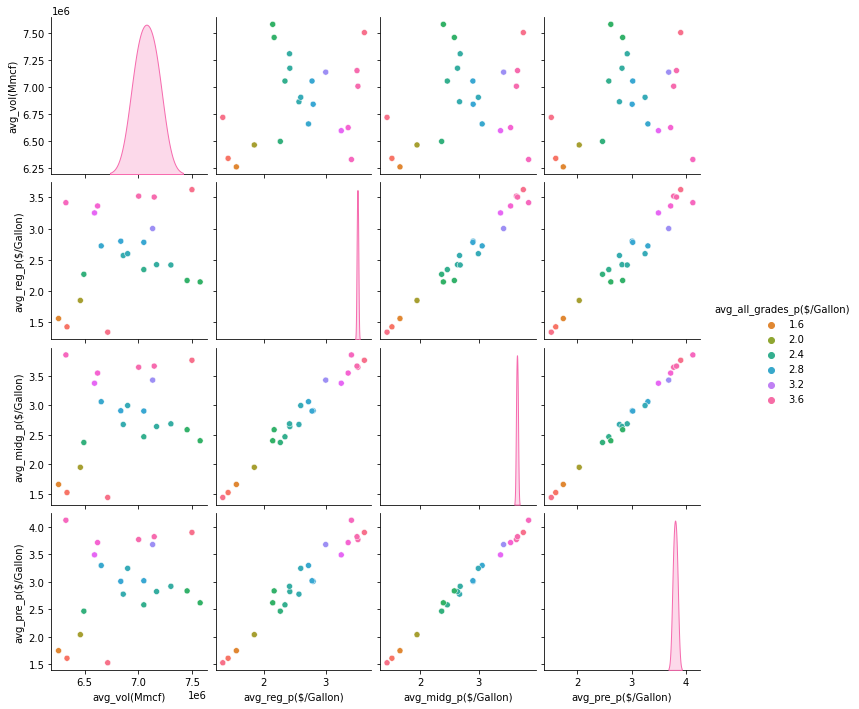

In [25]:
import seaborn as sns
#define DATA
data = annual_gas_summary[['avg_vol(Mmcf)','avg_all_grades_p($/Gallon)', 'avg_reg_p($/Gallon)','avg_midg_p($/Gallon)','avg_pre_p($/Gallon)']]
sns.pairplot(data, hue = 'avg_all_grades_p($/Gallon)',palette='husl')

### with one more variable - average production

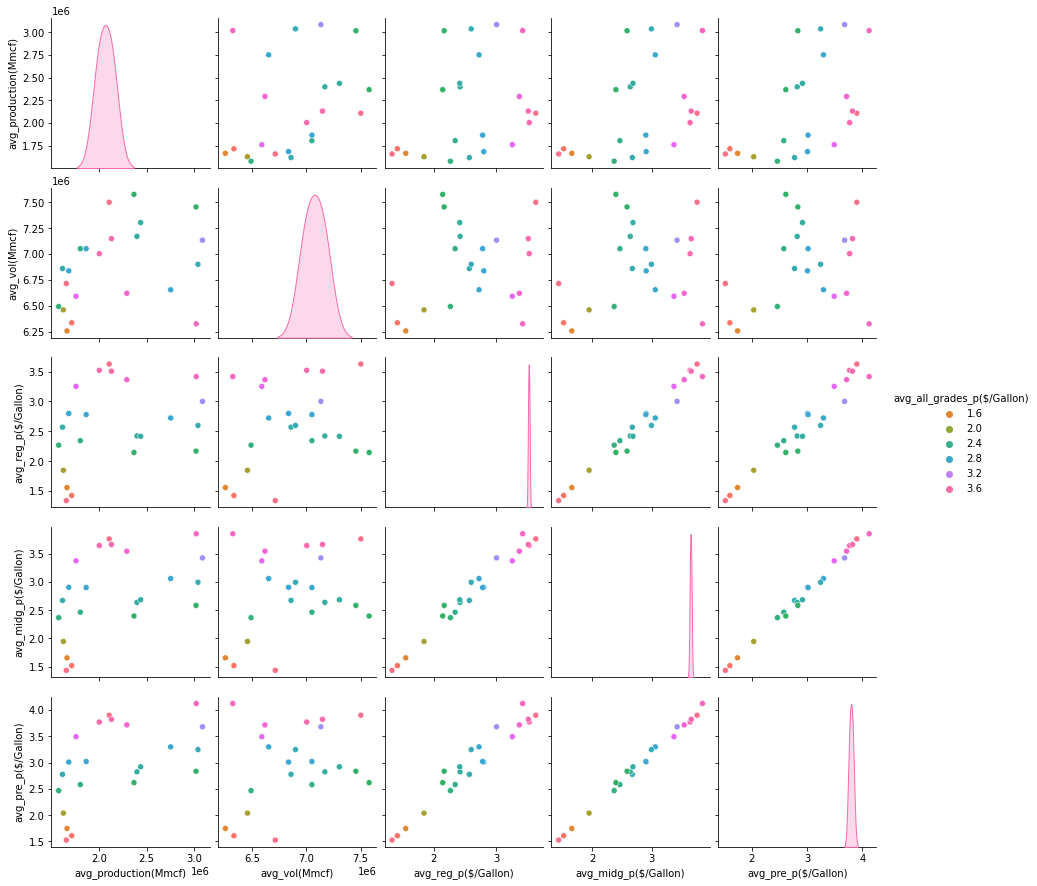

In [26]:
data = annual_gas_summary[['avg_production(Mmcf)','avg_vol(Mmcf)','avg_all_grades_p($/Gallon)', 'avg_reg_p($/Gallon)','avg_midg_p($/Gallon)','avg_pre_p($/Gallon)']]
sns.pairplot(data, hue = 'avg_all_grades_p($/Gallon)',palette='husl')

In [27]:
# useful interpretation
## https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

# Multilinear Regression with 4 more factors 
### Inflation, Working population, Stock market to GDP Percentage, and Interest_rate

In [28]:
#initialize X, y
X = annual_gas_summary_more.drop(columns = ['avg_all_grades_p($/Gallon)'])
y = annual_gas_summary_more['avg_all_grades_p($/Gallon)'].values.reshape(-1,1)

In [29]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [30]:
#Scale data
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
X_train_s = data_scaler.fit_transform(X_train)
X_test_s = data_scaler.fit_transform(X_test)

In [31]:
#create instance of model
model = LinearRegression()

In [32]:
#train the model
model.fit(X_train_s, y_train)

LinearRegression()

In [33]:
#create prediction to test
y_pred = model.predict(X_train_s)

In [34]:
#results
print('Multi-Linear_Regression Model Result:')
print(y_pred.shape)
print('---------------------------------------')
print('intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Multi-Linear_Regression Model Result:
(15, 1)
---------------------------------------
intercept: 
 [2.63623333]
Coefficients: 
 [[ 0.02169941 -0.01666174 -0.01625995 -0.00268678  0.01466605 -0.0228708
   0.05621146 -0.06697506  0.32975795  0.23605075  0.06660794  0.03536866
   0.00961803  0.00816742  0.00710507 -0.0106583 ]]


In [35]:
#initialize X, y
X = annual_gas_summary_more.drop(columns = ['avg_all_grades_p($/Gallon)'])
y = annual_gas_summary_more['avg_all_grades_p($/Gallon)'].values.reshape(-1,1)

In [36]:
X = sm.add_constant(X)

C:\Users\kimbe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [37]:
sm_model = sm.OLS(y, X).fit()

In [38]:
predictions = sm_model.predict(X)

In [39]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.064e+04
Date:                Thu, 19 May 2022   Prob (F-statistic):           1.27e-07
Time:                        20:55:22   Log-Likelihood:                 104.56
No. Observations:                  20   AIC:                            -175.1
Df Residuals:                       3   BIC:                            -158.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Visualize with the effective factors (only 2)

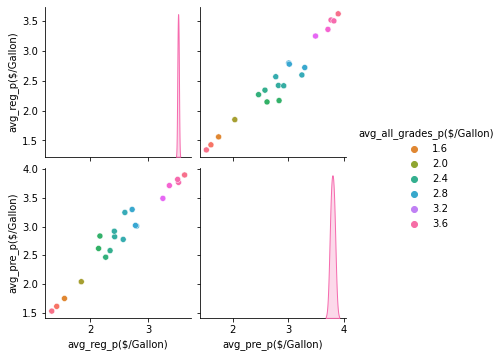

In [45]:
data = annual_gas_summary_more[['avg_all_grades_p($/Gallon)', 'avg_reg_p($/Gallon)','avg_pre_p($/Gallon)']]
sns.pairplot(data, hue = 'avg_all_grades_p($/Gallon)',palette='husl')

# Monthly data analysis

In [41]:
#group by data 'month' - gas production
monthly_gas_production = us_gas_data.groupby(['Month']).mean()['Gas_Procution(Mmcf)']
monthly_gas_consumption = us_gas_data.groupby(['Month']).mean()['Gas_Consumption(Mmcf)']
monthly_gas_import_p = us_gas_data.groupby(['Month']).mean()['Import_price($/Mcf)']
monthly_gas_export_p = us_gas_data.groupby(['Month']).mean()['Export_price($/Mcf)']
monthly_total_import = us_gas_data.groupby(['Month']).mean()['Total Imports (Mmcf)']
monthly_total_export = us_gas_data.groupby(['Month']).mean()['Total Exports (Mmcf)']
monthly_avg_all_grades_p = us_gas_data.groupby(['Month']).mean()['all_grades($/Gallon)']
monthly_avg_reg_p = us_gas_data.groupby(['Month']).mean()['regular($/Gallon)']
monthly_avg_midg_p = us_gas_data.groupby(['Month']).mean()['midgrade($/Gallon)']
monthly_avg_pre_p = us_gas_data.groupby(['Month']).mean()['premium($/Gallon)']
monthly_avg_dis_p = us_gas_data.groupby(['Month']).mean()['diesel($/Gallon)']
monthly_avg_vol = us_gas_data.groupby(['Month']).mean()['Volumn(Mmcf)']

In [42]:
# create annual summary, reorder columns
monthly_gas_summary = pd.DataFrame({
    'avg_production(Mmcf)': monthly_gas_production,
    'avg_consumption(Mmcf)': monthly_gas_consumption,
    'avg_vol(Mmcf)': monthly_avg_vol,
    'avg_total_import(Mmcf)': monthly_total_import,
    'avg_toal_export(Mmcf)': monthly_total_export,
    'avg_import_price($/Mmcf)': monthly_gas_import_p,
    'avg_export_price($/Mmcf)': monthly_gas_export_p,
    'avg_all_grades_p($/Gallon)': monthly_avg_all_grades_p,
    'avg_reg_p($/Gallon)': monthly_avg_reg_p,
    'avg_midg_p($/Gallon)': monthly_avg_midg_p,
    'avg_pre_p($/Gallon)': monthly_avg_pre_p,
    'avg_dis_p($/Gallon)': monthly_avg_dis_p 
})

monthly_gas_summary.head()

,avg_production(Mmcf),avg_consumption(Mmcf),avg_vol(Mmcf),avg_total_import(Mmcf),avg_toal_export(Mmcf),avg_import_price($/Mmcf),avg_export_price($/Mmcf),avg_all_grades_p($/Gallon),avg_reg_p($/Gallon),avg_midg_p($/Gallon),avg_pre_p($/Gallon),avg_dis_p($/Gallon)
Month,,,,,,,,,,,,
1,2.176798e+06,2.900654e+06,6.573022e+06,329209.863636,191141.227273,5.346818,5.325909,2.434045,2.365364,2.559727,2.721318,2.693909
2,1.980882e+06,2.584856e+06,6.020566e+06,290862.454545,172537.863636,5.126364,5.646364,2.492545,2.424727,2.616136,2.775182,2.732500
3,2.156907e+06,2.372026e+06,5.850328e+06,301041.476190,177765.095238,4.628571,4.960000,2.574619,2.509286,2.688333,2.837000,2.756238
4,2.087371e+06,1.924890e+06,6.059108e+06,273109.666667,152638.666667,4.178095,4.724762,2.671238,2.605000,2.787810,2.937000,2.790619
5,2.147666e+06,1.747473e+06,6.468206e+06,272039.666667,157155.333333,4.174762,4.860476,2.758190,2.694000,2.876667,3.026857,2.820333


In [43]:
monthly_gas_summary.dtypes

avg_production(Mmcf)          float64
avg_consumption(Mmcf)         float64
avg_vol(Mmcf)                 float64
avg_total_import(Mmcf)        float64
avg_toal_export(Mmcf)         float64
avg_import_price($/Mmcf)      float64
avg_export_price($/Mmcf)      float64
avg_all_grades_p($/Gallon)    float64
avg_reg_p($/Gallon)           float64
avg_midg_p($/Gallon)          float64
avg_pre_p($/Gallon)           float64
avg_dis_p($/Gallon)           float64
dtype: object